In [1]:
import pandas as pd
import numpy as np
import scanpy
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.decomposition

In [5]:
import glob
f_paths = glob.glob('segmented_cells_mouse*sample*.csv')
comb_df = pd.DataFrame()

for i,f_path in enumerate(f_paths):
    print(f_path)
    sub_df = pd.read_csv(f_path)
    sub_df['sample'] = f_path.split('_')[-1].split('.')[0]
    comb_df = pd.concat((comb_df, sub_df))
    
display(comb_df.shape)

segmented_cells_mouse2sample2.csv
segmented_cells_mouse2sample5.csv
segmented_cells_mouse1sample6.csv
segmented_cells_mouse1sample4.csv
segmented_cells_mouse1sample1.csv
segmented_cells_mouse1sample2.csv
segmented_cells_mouse2sample1.csv
segmented_cells_mouse1sample5.csv
segmented_cells_mouse1sample3.csv
segmented_cells_mouse2sample3.csv
segmented_cells_mouse2sample4.csv


(369859, 5)

In [6]:
comb_df.head()

,Unnamed: 0,boundaryX,boundaryY,slice_id,sample
0,102513782275574352391549636869222584212,"2097.1362953431903, 2097.1362953431903, 2097.1...","2346.248493306339, 2345.705993324518, 2345.163...",mouse2_slice10,mouse2sample2
1,107041692196035477511188554607640157689,"2113.628294790536, 2113.519794794172, 2113.519...","2204.981498040259, 2204.5474980548024, 2204.00...",mouse2_slice10,mouse2sample2
2,110408674460711617898157940394920278916,"2033.8807974629103, 2033.8807974629103, 2033.7...","2221.1479974985123, 2220.6054975166917, 2220.1...",mouse2_slice10,mouse2sample2
3,125816213715504060865256572787204926854,"1962.813299844414, 1962.813299844414, 1962.813...","2167.765999287367, 2167.2234993055463, 2166.68...",mouse2_slice10,mouse2sample2
4,134881201666222369753036768466528484685,"2141.40429385975, 2141.40429385975, 2141.40429...","2170.47849919647, 2169.935999214649, 2169.3934...",mouse2_slice10,mouse2sample2


In [7]:
comb_df = comb_df.rename(columns={'Unnamed: 0':'cell_id'})
comb_df.head()

,cell_id,boundaryX,boundaryY,slice_id,sample
0,102513782275574352391549636869222584212,"2097.1362953431903, 2097.1362953431903, 2097.1...","2346.248493306339, 2345.705993324518, 2345.163...",mouse2_slice10,mouse2sample2
1,107041692196035477511188554607640157689,"2113.628294790536, 2113.519794794172, 2113.519...","2204.981498040259, 2204.5474980548024, 2204.00...",mouse2_slice10,mouse2sample2
2,110408674460711617898157940394920278916,"2033.8807974629103, 2033.8807974629103, 2033.7...","2221.1479974985123, 2220.6054975166917, 2220.1...",mouse2_slice10,mouse2sample2
3,125816213715504060865256572787204926854,"1962.813299844414, 1962.813299844414, 1962.813...","2167.765999287367, 2167.2234993055463, 2166.68...",mouse2_slice10,mouse2sample2
4,134881201666222369753036768466528484685,"2141.40429385975, 2141.40429385975, 2141.40429...","2170.47849919647, 2169.935999214649, 2169.3934...",mouse2_slice10,mouse2sample2


In [8]:
comb_df.to_csv('segmented_cell_shapes.csv',index=False)

In [2]:
sc = scanpy.read_h5ad('../processed_data/counts.h5ad')
sc

AnnData object with n_obs × n_vars = 280327 × 254

#280,327 cells
#254 genes
#I don't know if this counts is pre-processed or not

They said that:

> We   normalized the mean   total RNA   counts per cell to a same mean value (250 in this case) for each experiment to   remove the influence   of  these  batch  effects  .

In [3]:
counts_df = sc.to_df()
counts_df

index,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Gad2,Tac2,Lamp5,Cnr1,Pvalb,Sst,Rab3b,Slc17a7,Penk,Gad1
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.659448,0.000000,...,0.261892,0.262109,0.037601,0.010633,0.192950,0.079685,0.063194,0.613834,0.038716,0.000000
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.512115,0.225832,0.093828,0.000000,0.160687,0.171461,0.208027,0.618113,0.051407,0.000000
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,25.567039,0.0,0.000000,0.000000,0.000000,0.000000,...,0.199059,0.114653,0.000000,0.070231,0.144294,0.051351,0.148232,0.448829,0.041903,0.000000
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.240500,0.093413,0.033100,0.151837,0.197471,0.011399,0.110675,1.117577,0.016462,0.467554
100009332472089331948140672873134747603,0.0,0.491629,0.0,0.983257,0.491629,0.0,0.000000,0.000000,0.983257,0.000000,...,1.726676,0.533404,3.691514,0.000000,0.296567,0.748264,1.423427,11.386119,0.387408,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987465505639073211021560543065098772,0.0,0.000000,0.0,0.557620,0.000000,0.0,0.000000,0.000000,0.557620,2.788098,...,4.711612,1.145445,0.000000,0.362137,1.549598,0.195306,4.132728,1.586415,0.152228,8.515803
99989592830367590092304100078674096866,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.829112,14.632893,0.000000,...,0.354238,0.160562,0.630489,0.030634,0.073509,0.000000,0.210928,4.954309,0.140572,0.107833
99991756591196613545069880666241120777,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.944207,0.221704,0.139209,0.854429,0.296027,0.110999,0.432686,5.654802,0.042431,0.004518


In [4]:
bin_counts_df = counts_df > 0
cell_gene_counts = bin_counts_df.sum(axis=1).reset_index(name='num_distinct_genes')
cell_gene_counts

,index,num_distinct_genes
0,10000143038275111136124942858811168393,54
1,100001798412490480358118871918100400402,28
2,100006878605830627922364612565348097824,26
3,100007228202835962319771548915451072492,30
4,100009332472089331948140672873134747603,127
...,...,...
280322,99987465505639073211021560543065098772,112
280323,99989592830367590092304100078674096866,57
280324,99991756591196613545069880666241120777,27
280325,99997421766159526763299676887100858104,53


In [6]:
cell_gene_counts['num_distinct_genes'].median()

76.0

In [5]:
cell_gene_counts['num_distinct_genes'].mean()

75.62902966892237

In [7]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')
spots.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2
1,-4183.0010,1688.5905,0.0,Acta2,1,281878279612082858224382179441472205807,mouse1sample2
2,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
3,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
4,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2


In [9]:
uniq_gene_per_cell = spots.groupby('cell_id')['target_molecule_name'].unique().apply(len)
uniq_gene_per_cell.head()

cell_id
10000143038275111136124942858811168393     41
100007228202835962319771548915451072492    25
100013893144618144270850756017896167367    63
100017533667894826939857215877082515137    31
100018547319796564052034805202079258035    23
Name: target_molecule_name, dtype: int64

In [10]:
cell_gene_counts['from_spots'] = cell_gene_counts['index'].map(uniq_gene_per_cell)
cell_gene_counts.head()

,index,num_distinct_genes,from_spots
0,10000143038275111136124942858811168393,54,41.0
1,100001798412490480358118871918100400402,28,NaN
2,100006878605830627922364612565348097824,26,NaN
3,100007228202835962319771548915451072492,30,25.0
4,100009332472089331948140672873134747603,127,NaN


(237949, 3)


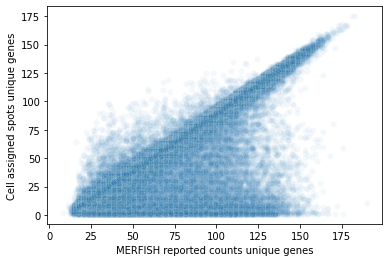

In [26]:
subset_df = cell_gene_counts[cell_gene_counts['from_spots'].notnull()]

sns.scatterplot(
    x = 'num_distinct_genes',
    y = 'from_spots',
    alpha = 0.05,
    data = subset_df,
)
print(subset_df.shape)
plt.xlabel('MERFISH reported counts unique genes')
plt.ylabel('Cell assigned spots unique genes')
plt.show()
plt.close()

42378

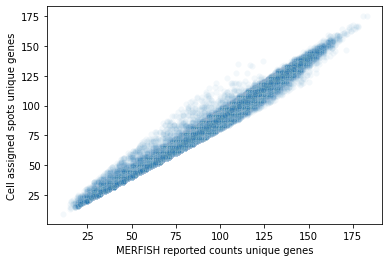

In [29]:
#Limit to just cells with similar gene counts between the two methods
subset_df = cell_gene_counts[
    (cell_gene_counts['num_distinct_genes']/cell_gene_counts['from_spots'])
    .between(0.8,1.25)
]

sns.scatterplot(
    x = 'num_distinct_genes',
    y = 'from_spots',
    alpha = 0.05,
    data = subset_df,
)
plt.xlabel('MERFISH reported counts unique genes')
plt.ylabel('Cell assigned spots unique genes')
plt.show()
plt.close()

In [22]:
cell_gene_counts.shape

(280327, 3)

In [21]:
subset_df.shape

(148457, 3)

In [30]:
subset_df['index'].to_csv('../processed_data/cell_ids_matching_gene_counts.csv',index=None)

In [31]:
spots.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2
1,-4183.0010,1688.5905,0.0,Acta2,1,281878279612082858224382179441472205807,mouse1sample2
2,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
3,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
4,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2


In [33]:
cell_gene_nums = spots.groupby(['cell_id','target_molecule_name']).size().reset_index()
cell_gene_nums

,cell_id,target_molecule_name,0
0,10000143038275111136124942858811168393,Adra1b,1
1,10000143038275111136124942858811168393,Aqp4,1
2,10000143038275111136124942858811168393,Bcl11b,1
3,10000143038275111136124942858811168393,Brinp3,1
4,10000143038275111136124942858811168393,Cdh20,3
...,...,...,...
14615930,99997470167777465101376150817407669505,Trpc6,1
14615931,99997470167777465101376150817407669505,Unc5d,4
14615932,99997470167777465101376150817407669505,Ust,5
14615933,99997470167777465101376150817407669505,Vtn,1


In [34]:
cell_gene_nums.rename(columns={0:'num_spots'},inplace=True)
cell_gene_nums

,cell_id,target_molecule_name,num_spots
0,10000143038275111136124942858811168393,Adra1b,1
1,10000143038275111136124942858811168393,Aqp4,1
2,10000143038275111136124942858811168393,Bcl11b,1
3,10000143038275111136124942858811168393,Brinp3,1
4,10000143038275111136124942858811168393,Cdh20,3
...,...,...,...
14615930,99997470167777465101376150817407669505,Trpc6,1
14615931,99997470167777465101376150817407669505,Unc5d,4
14615932,99997470167777465101376150817407669505,Ust,5
14615933,99997470167777465101376150817407669505,Vtn,1


In [42]:
quantiles = np.arange(0.1,1.1,0.1)
qs = cell_gene_nums.groupby('target_molecule_name')['num_spots'].quantile(quantiles)
qs

target_molecule_name     
1700022I11Rik         0.1     1.0
                      0.2     1.0
                      0.3     1.0
                      0.4     1.0
                      0.5     1.0
                             ... 
Zfp804b               0.6     1.0
                      0.7     2.0
                      0.8     2.0
                      0.9     3.0
                      1.0    18.0
Name: num_spots, Length: 2520, dtype: float64

In [47]:
q_tab = qs.reset_index().pivot_table(
    index='target_molecule_name',
    columns='level_1',
    values='num_spots',
)
q_tab

level_1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
target_molecule_name,,,,,,,,,,
1700022I11Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
1810046K07Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0
5031425F14Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
5730522E02Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
Acta2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,275.0
...,...,...,...,...,...,...,...,...,...,...
Vtn,1.0,1.0,1.0,1.0,1.0,2.0,3.0,11.0,38.0,327.0
Vwc2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,30.0
Wipf3,1.0,2.0,4.0,7.0,10.0,14.0,20.0,28.0,44.0,295.0


In [63]:
q_tab

,target_molecule_name,q10,q20,q30,q40,q50,q60,q70,q80,q90,q100
0,1700022I11Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
1,1810046K07Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0
2,5031425F14Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
3,5730522E02Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
4,Acta2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...
247,Vtn,1.0,1.0,1.0,1.0,1.0,2.0,3.0,11.0,38.0,327.0
248,Vwc2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,30.0
249,Wipf3,1.0,2.0,4.0,7.0,10.0,14.0,20.0,28.0,44.0,295.0
250,Wnt7b,1.0,1.0,1.0,2.0,2.0,3.0,4.0,6.0,13.0,108.0


q10


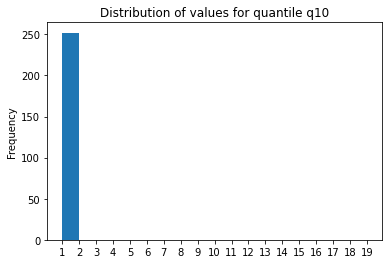

q20


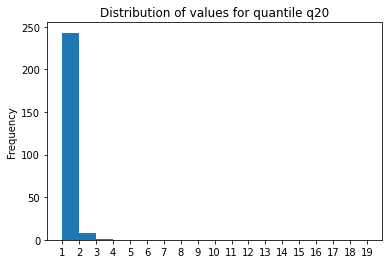

q30


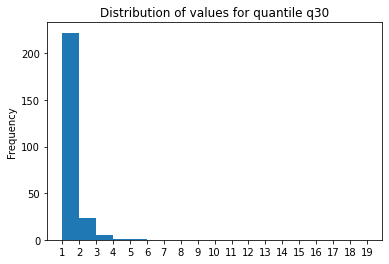

q40


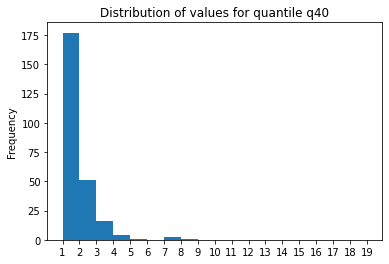

q50


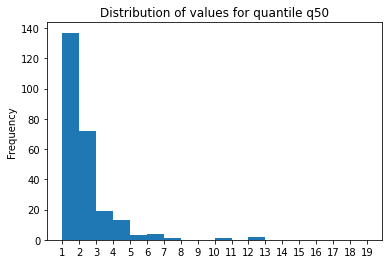

q60


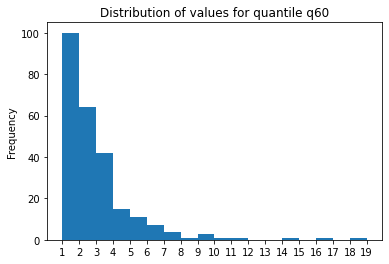

q70


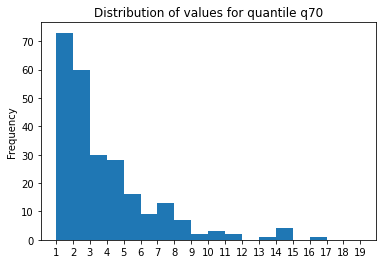

q80


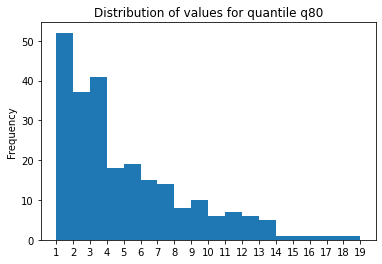

q90


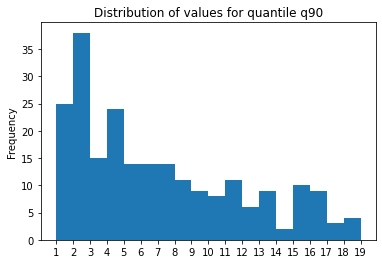

q100


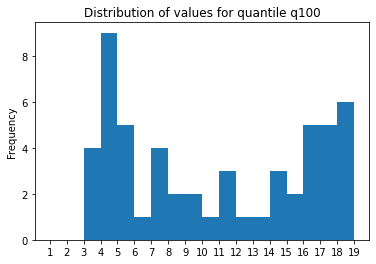

In [72]:
q_tab = pd.read_csv('/oak/stanford/groups/horence/rob/isoform_localizations/processed_data/gene_per_cell_quantiles.csv')
q_tab = q_tab.set_index('target_molecule_name')
for c in q_tab.columns:
    print(c)
    bins=np.arange(1,20)
    q_tab[c].plot.hist(bins=bins)
    plt.title('Distribution of values for quantile {}'.format(c))
    plt.xticks(bins)
    plt.show()
    plt.close()

In [74]:
q_tab

,q10,q20,q30,q40,q50,q60,q70,q80,q90,q100
target_molecule_name,,,,,,,,,,
1700022I11Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
1810046K07Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0
5031425F14Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
5730522E02Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
Acta2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,275.0
...,...,...,...,...,...,...,...,...,...,...
Vtn,1.0,1.0,1.0,1.0,1.0,2.0,3.0,11.0,38.0,327.0
Vwc2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,30.0
Wipf3,1.0,2.0,4.0,7.0,10.0,14.0,20.0,28.0,44.0,295.0


In [78]:
cell_gene_nums['q90'] = cell_gene_nums['target_molecule_name'].map(q_tab['q90'])
cell_gene_nums.head()

,cell_id,target_molecule_name,num_spots,q90
0,10000143038275111136124942858811168393,Adra1b,1,16.0
1,10000143038275111136124942858811168393,Aqp4,1,8.0
2,10000143038275111136124942858811168393,Bcl11b,1,24.0
3,10000143038275111136124942858811168393,Brinp3,1,8.0
4,10000143038275111136124942858811168393,Cdh20,3,8.0


In [84]:
passers = cell_gene_nums[cell_gene_nums['num_spots'].gt(cell_gene_nums['q90'])]
passers.shape

(1292927, 4)

In [86]:
passers['cell_id'].unique().size

162374

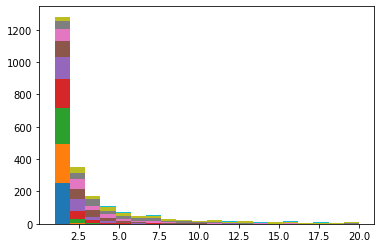

In [71]:
plt.hist([q_tab['q10'],q_tab['q20'],q_tab['q30'],
          q_tab['q40'],q_tab['q50'],q_tab['q60'],
          q_tab['q70'],q_tab['q80'],q_tab['q90'],q_tab['q100']],
          bins=20, range=(1,20), stacked=True)
plt.show()
plt.close()

In [48]:
q_tab.to_csv('../processed_data/gene_per_cell_quantiles.csv')

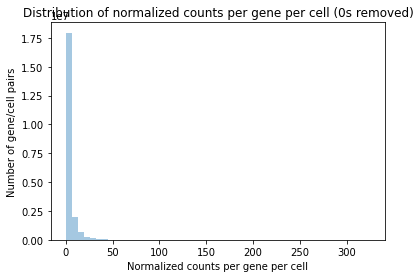

In [12]:
vs = (counts_df.values).flatten()
sns.distplot(
    vs[vs > 0],
    kde = False,
)
plt.title('Distribution of normalized counts per gene per cell (0s removed)')
plt.xlabel('Normalized counts per gene per cell')
plt.ylabel('Number of gene/cell pairs')
plt.show()
plt.close()

In [8]:
sc.to_df().sum(axis=1).mean()

276.2484

## Ok I think that this is post-processed data since the mean of RNA counts in all cells is around 250

It's not exactly 250 because the cells are in different experiments for normalization, but I normed over all cells here. Actually I'm not sure that makes sense. No, I don't think it does


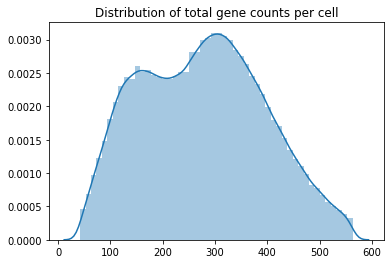

In [11]:
sns.distplot(
    sc.to_df().sum(axis=1),
)
plt.title('Distribution of total gene counts per cell')
plt.show()
plt.close()

Interestingly, to me at least, they did PCA before clustering

>   We  performed     dimensionality  reduction   of   the     matrix     using   PCA  ,   and  used     the   first  35     principal  components

In [24]:
x = sc.to_df()
print(x.shape)
pca = sklearn.decomposition.PCA(n_components = 35)
y = pca.fit_transform(x)
print(x.shape)
print(y.shape)

(280327, 254)
(280327, 254)
(280327, 35)


> We  then  performed   graph  -  based  Louvain  community  detection  42     in  the   35     PC     space     using Scanpy  65     for a range of   nearest     neighborhood size k     values     with a     bootstrap     analysis to both   identify stable clusters and select the optimal k     value   (k = 10) 

In [29]:
pca_sc = scanpy.AnnData(y)
scanpy.pp.neighbors(pca_sc, n_neighbors=10)
scanpy.tl.louvain(pca_sc)

ModuleNotFoundError: No module named 'louvain'

In [35]:
pca_sc.obs['louvain']

0          5
1          2
2          7
3          2
4          0
          ..
280322    14
280323    13
280324     4
280325    13
280326     0
Name: louvain, Length: 280327, dtype: category
Categories (29, object): [0, 1, 2, 3, ..., 25, 26, 27, 28]

In [38]:
pca_sc.obs['louvain'].unique().size

29

## only getting 29 categories, MERFISH said they got 95

Reading more, they do multiple rounds of clustering and lots of filtering
I should ask them for the cell type info, don't waste time trying to copy all their clustering

Alternatively, I can cluster the scRNAseq and MERFISH data together to find clusters that way

In [39]:
scanpy.tl.umap(pca_sc)

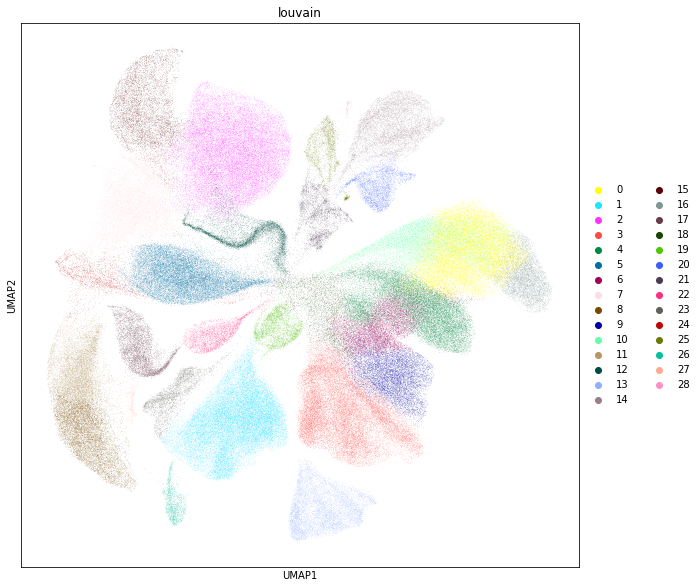

In [46]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
scanpy.pl.umap(pca_sc, color='louvain')

In [55]:
cell_groupings = pd.DataFrame({
    'cell_id':sc.to_df().index,
    'cluster':pca_sc.obs['louvain'],
})
cell_groupings

,cell_id,cluster
0,10000143038275111136124942858811168393,5
1,100001798412490480358118871918100400402,2
2,100006878605830627922364612565348097824,7
3,100007228202835962319771548915451072492,2
4,100009332472089331948140672873134747603,0
...,...,...
280322,99987465505639073211021560543065098772,14
280323,99989592830367590092304100078674096866,13
280324,99991756591196613545069880666241120777,4
280325,99997421766159526763299676887100858104,13


In [57]:
cell_groupings.to_csv('20210105_raw_louvain_clusters.csv',index=False)